In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D



In [3]:
#Importation du dataSet de Mnist
from tensorflow.keras.datasets import mnist
(X_train,y_train),(X_test,y_test)= mnist.load_data()

1
1
7
3
5
1
4
3
1
1


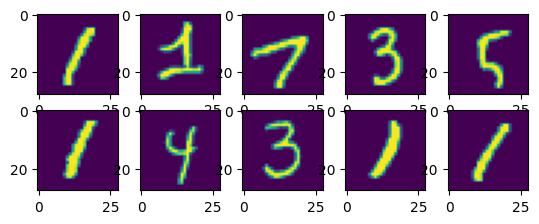

In [4]:
import random
for i in range(10):
     rand=random.randint(0,120)
     plt.subplot(4,5,i+1)
     plt.imshow(X_train[rand])
     print(y_train[rand])

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
np.unique(y_train).size

10

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(256,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())




In [10]:
model.add(Dense(128))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['sparse_categorical_accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 256)       2560      
                                                                 
 activation (Activation)     (None, 26, 26, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 256)       0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 43264)             0         
                                                                 
 dense (Dense)               (None, 128)               5537920   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [12]:
model.fit(X_train,y_train,batch_size=50,epochs=4)

Epoch 1/4
1200/1200 [==============================] - 154s 127ms/step - loss: 0.1267 - sparse_categorical_accuracy: 0.9614
Epoch 2/4
1200/1200 [==============================] - 158s 131ms/step - loss: 0.0519 - sparse_categorical_accuracy: 0.9839
Epoch 3/4
1200/1200 [==============================] - 155s 129ms/step - loss: 0.0354 - sparse_categorical_accuracy: 0.9890
Epoch 4/4
1200/1200 [==============================] - 156s 130ms/step - loss: 0.0258 - sparse_categorical_accuracy: 0.9913


In [24]:
test_loss,acc_loss=model.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 0.0629 - sparse_categorical_accuracy: 0.9830


1/1 [==============================] - 0s 25ms/step
Prediction: 7
Prediction correcte
1/1 [==============================] - 0s 30ms/step
Prediction: 2
Prediction correcte
1/1 [==============================] - 0s 29ms/step
Prediction: 1
Prediction correcte
1/1 [==============================] - 0s 23ms/step
Prediction: 0
Prediction correcte
1/1 [==============================] - 0s 26ms/step
Prediction: 4
Prediction correcte
1/1 [==============================] - 0s 39ms/step
Prediction: 1
Prediction correcte
1/1 [==============================] - 0s 29ms/step
Prediction: 4
Prediction correcte
1/1 [==============================] - 0s 26ms/step
Prediction: 9
Prediction correcte
1/1 [==============================] - 0s 25ms/step
Prediction: 5
Prediction correcte
1/1 [==============================] - 0s 34ms/step
Prediction: 9
Prediction correcte
1/1 [==============================] - 0s 29ms/step
Prediction: 0
Prediction correcte
1/1 [==============================] - 0s 33ms/step
Pr

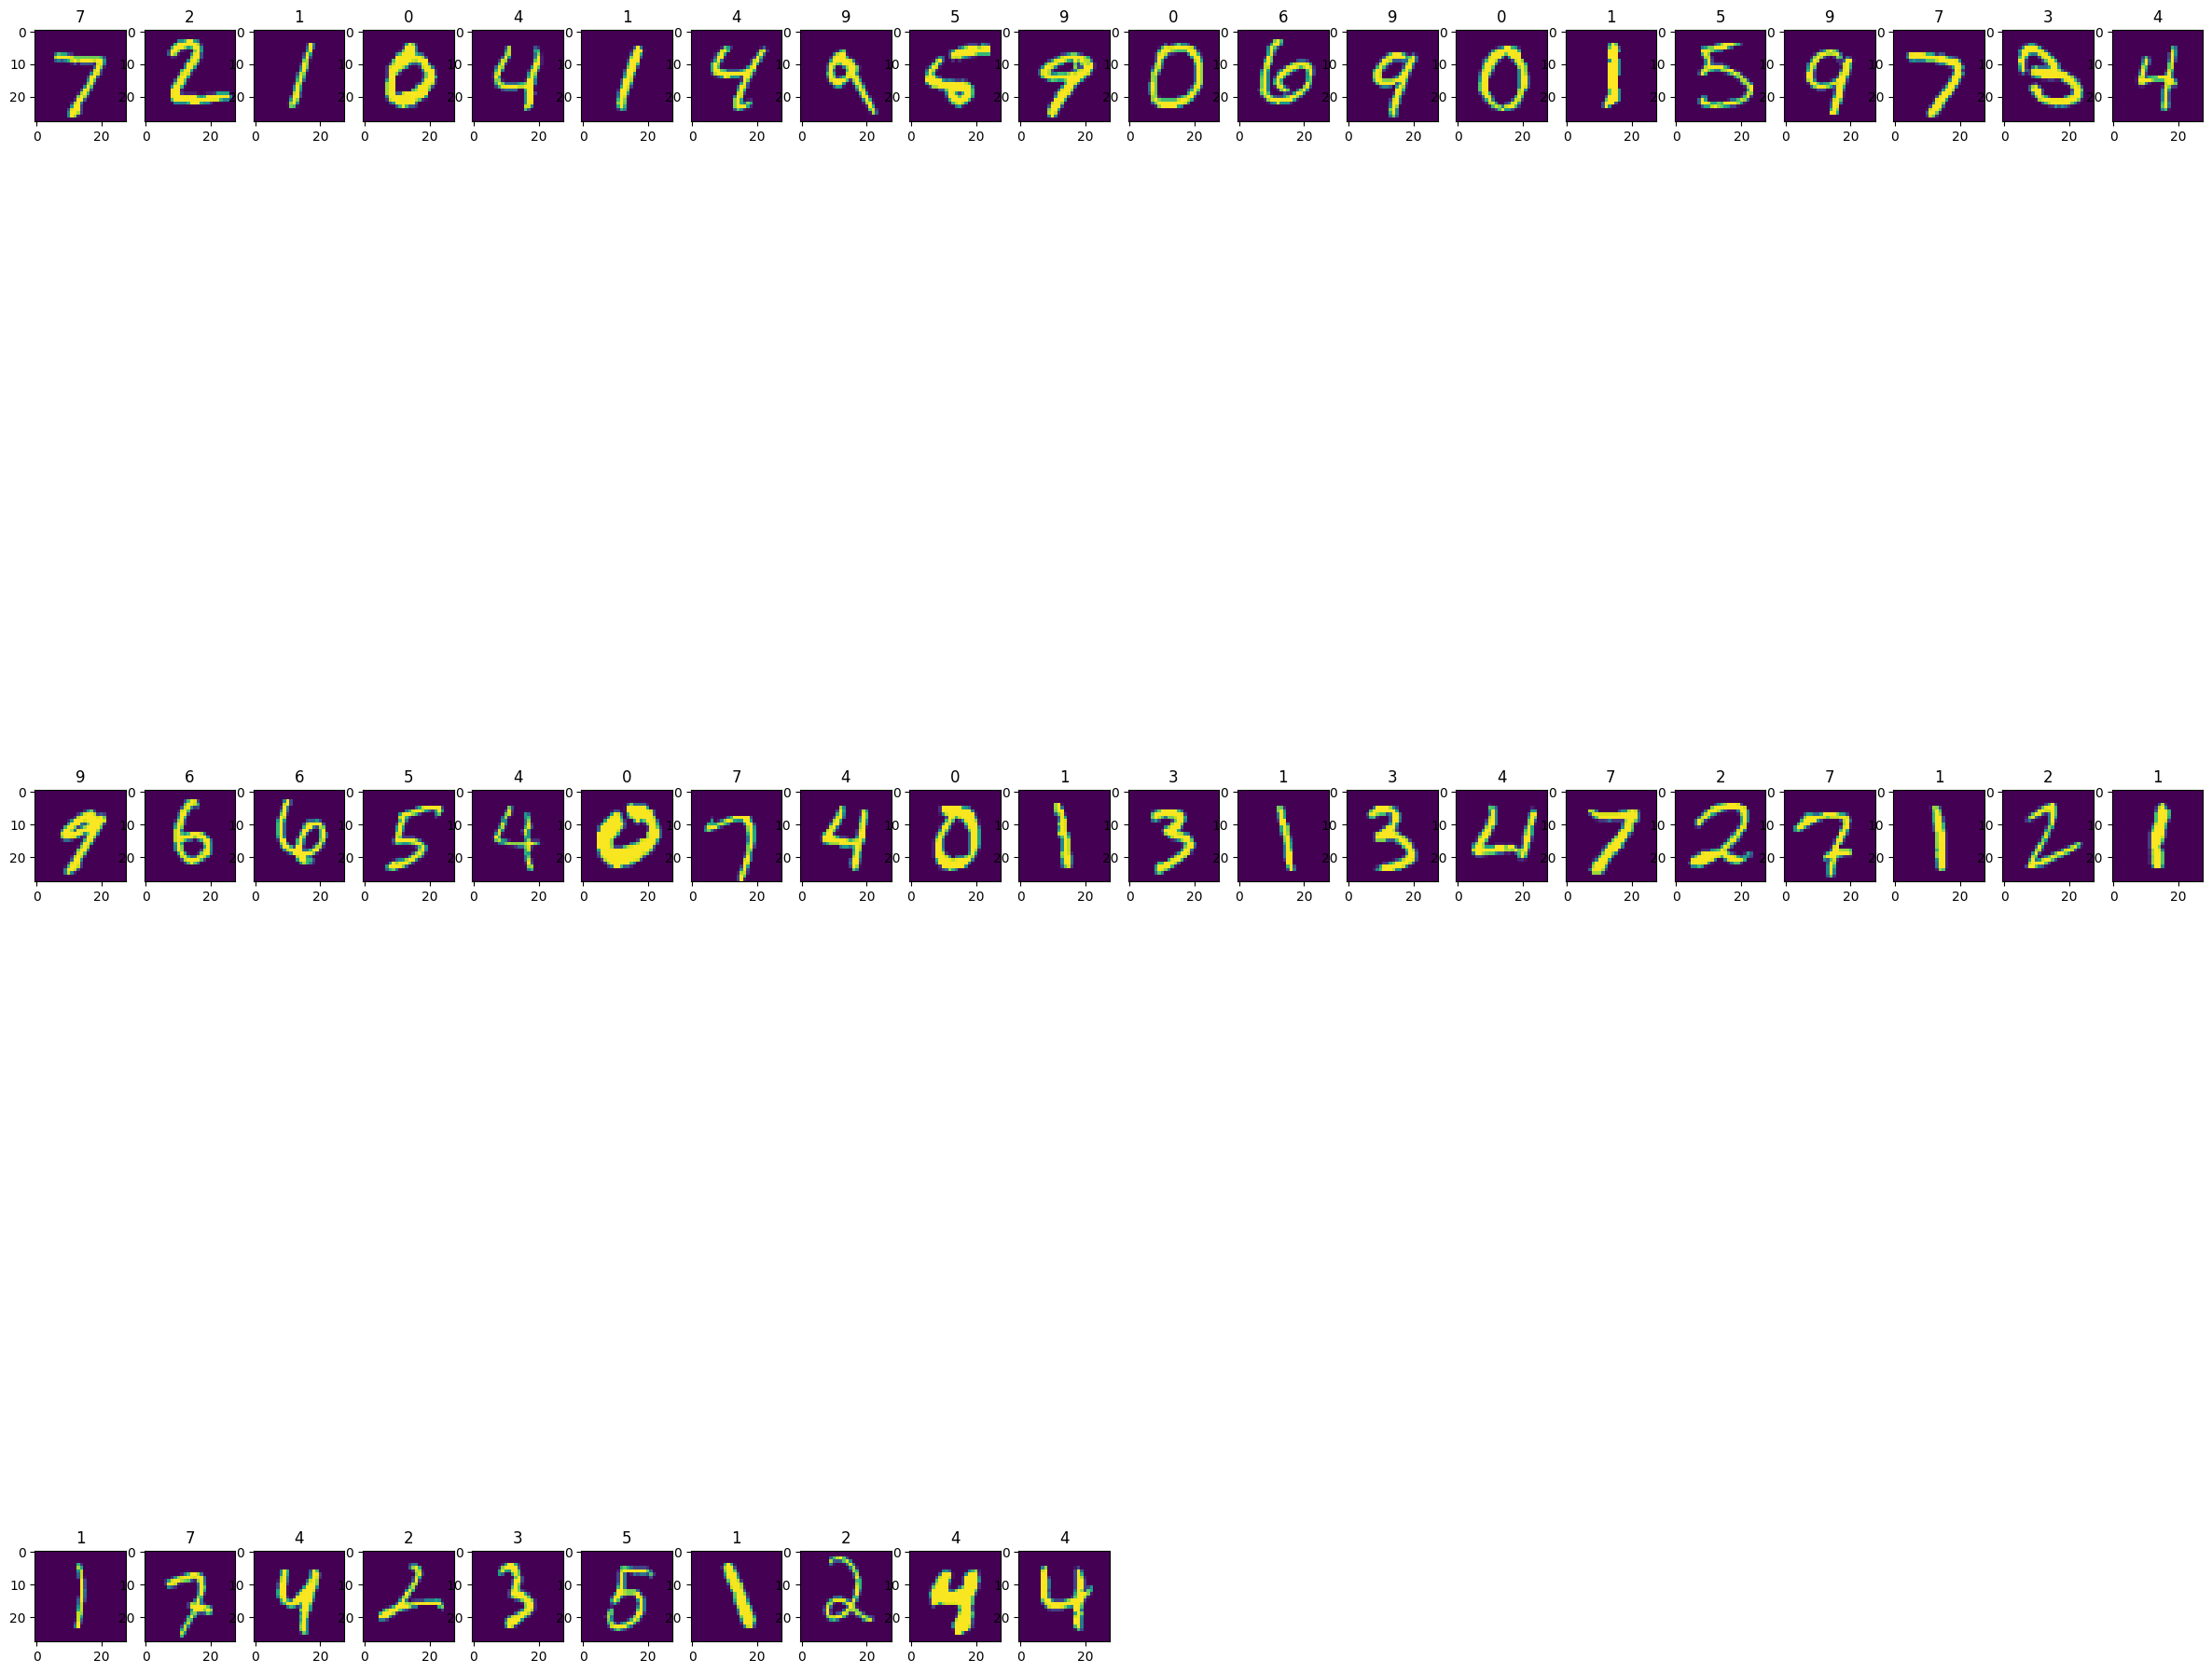

In [54]:
evalution_list=[]
plt.figure(figsize=(30,30))
for k in range(0,50):
    
    plt.subplot(3,20,)
    y_pred=np.argmax(model.predict(X_test[k].reshape(1,28,28,1)))


    print('Prediction:',y_pred)
    if y_pred==y_test[k]:
        print("Prediction correcte")
        evalution_list.append(1)
    else :
        print("Prediction incorrecte")
        evalution_list.append(0)
    plt.imshow(X_test[k])
    plt.title(y_test[k])

a=evalution_list.count(1)
print("Sur les tests effectués sur les ",k+1,"premières images du test set, le model a predire:",a," bonnes reponses \n.Soit, ",100*a/(k+1),"% de reussite.")



In [45]:
a=evalution_list.count(1)
print("Sur les ",k+1,"tests effectués le model a predire:",a," bonnes reponses \n.Soit, ",100*a/(k+1),"% de reussite.")


50 49 1.0
